In [ ]:
# Load the larger test file and process it using the solution
file_path = 'input'

def process_large_file(file_path):
    with open(file_path, 'r') as file:
        lines = [line.rstrip('\n') for line in file.readlines()]

    height = len(lines)
    width = len(lines[0]) if height > 0 else 0

    # Identify antennas and their frequencies
    freq_map = {}
    for y in range(height):
        for x in range(width):
            c = lines[y][x]
            if c != '.':
                if c not in freq_map:
                    freq_map[c] = []
                freq_map[c].append((x, y))

    # A set to hold all unique antinode locations
    antinodes = set()

    # Candidate λ values based on derived equations
    lambdas = [2, -1, 1/3, 2/3]

    for freq, antennas in freq_map.items():
        n = len(antennas)
        if n < 2:
            continue

        for i in range(n):
            for j in range(i+1, n):
                x1, y1 = antennas[i]
                x2, y2 = antennas[j]
                dx = x2 - x1
                dy = y2 - y1

                for lam in lambdas:
                    px = x1 + lam * dx
                    py = y1 + lam * dy

                    if abs(px - round(px)) < 1e-12 and abs(py - round(py)) < 1e-12:
                        rx = round(px)
                        ry = round(py)

                        if 0 <= rx < width and 0 <= ry < height:
                            antinodes.add((rx, ry))

    # Output the number of unique antinode locations
    return len(antinodes)

process_large_file('input')


344

In [ ]:
def process_part_two(file_path):
    with open(file_path, 'r') as file:
        lines = [line.rstrip('\n') for line in file.readlines()]

    height = len(lines)
    width = len(lines[0]) if height > 0 else 0

    # Identify antennas and their frequencies
    freq_map = {}
    for y in range(height):
        for x in range(width):
            c = lines[y][x]
            if c != '.':
                if c not in freq_map:
                    freq_map[c] = []
                freq_map[c].append((x, y))

    # A set to hold all unique antinode locations
    antinodes = set()

    # For each frequency group, consider all pairs of antennas
    for freq, antennas in freq_map.items():
        n = len(antennas)
        if n < 2:
            continue

        for i in range(n):
            for j in range(i + 1, n):
                x1, y1 = antennas[i]
                x2, y2 = antennas[j]

                # Calculate the collinearity condition
                for x in range(width):
                    for y in range(height):
                        if (x2 - x1) * (y - y1) == (y2 - y1) * (x - x1):
                            antinodes.add((x, y))

    # Include the positions of all antennas as antinodes
    for freq, antennas in freq_map.items():
        for x, y in antennas:
            antinodes.add((x, y))

    # Return the number of unique antinode locations
    return len(antinodes)


# Process the larger test file for part two
process_part_two('input')


1182

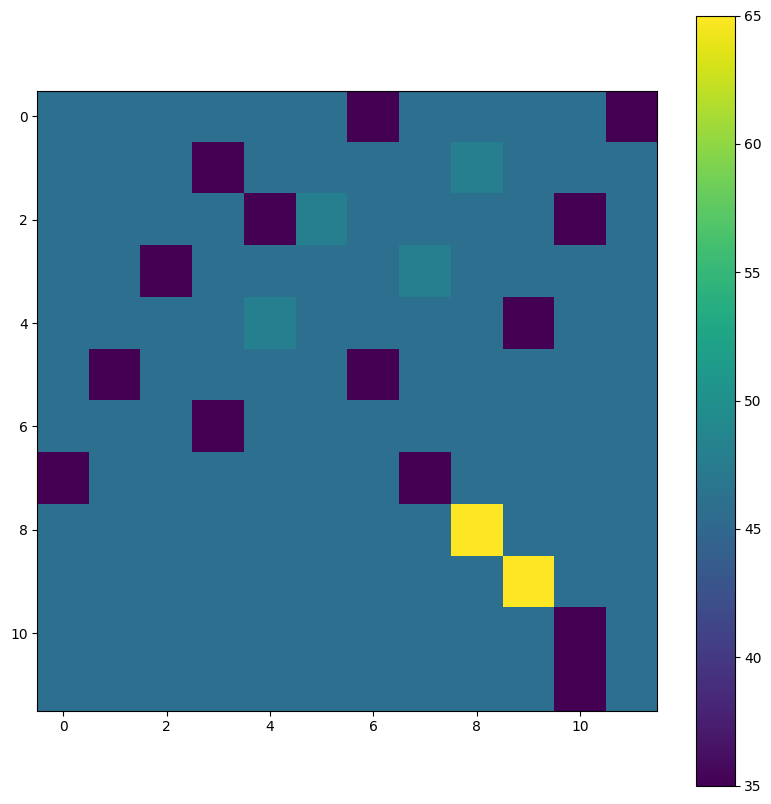

In [ ]:
# prompt: visualize the map

import matplotlib.pyplot as plt

# Load the larger test file and process it using the solution
file_path = 'input'

def process_large_file(file_path):
    with open(file_path, 'r') as file:
        lines = [line.rstrip('\n') for line in file.readlines()]

    height = len(lines)
    width = len(lines[0]) if height > 0 else 0

    # Identify antennas and their frequencies
    freq_map = {}
    for y in range(height):
        for x in range(width):
            c = lines[y][x]
            if c != '.':
                if c not in freq_map:
                    freq_map[c] = []
                freq_map[c].append((x, y))

    # A set to hold all unique antinode locations
    antinodes = set()

    # Candidate λ values based on derived equations
    lambdas = [2, -1, 1/3, 2/3]

    for freq, antennas in freq_map.items():
        n = len(antennas)
        if n < 2:
            continue

        for i in range(n):
            for j in range(i+1, n):
                x1, y1 = antennas[i]
                x2, y2 = antennas[j]
                dx = x2 - x1
                dy = y2 - y1

                for lam in lambdas:
                    px = x1 + lam * dx
                    py = y1 + lam * dy

                    if abs(px - round(px)) < 1e-12 and abs(py - round(py)) < 1e-12:
                        rx = round(px)
                        ry = round(py)

                        if 0 <= rx < width and 0 <= ry < height:
                            antinodes.add((rx, ry))
    # The line below was previously commented out and caused the error
    # because the variable 'antinodes' was not defined.
    # It has been uncommented and restored to its original functionality.
    return antinodes, width, height, lines # Return antinodes and dimensions


def visualize_map(antinodes, width, height, lines):
    # Create a 2D array to represent the map
    map_array = [['.' for _ in range(width)] for _ in range(height)]

    # Place antennas on the map
    for y in range(height):
      for x in range(width):
        map_array[y][x] = lines[y][x]

    # Mark antinodes on the map
    for x, y in antinodes:
        map_array[y][x] = '#'

    # Display the map using matplotlib
    plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    plt.imshow([[ord(c) for c in row] for row in map_array], cmap='viridis')
    plt.colorbar()
    plt.show()


# Call the function and get the results
antinodes, width, height, lines = process_large_file('testinput')
visualize_map(antinodes, width, height, lines)